In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/billboard-the-hot-100-songs/charts.csv


# Using the relevant data and importing libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../input/billboard-the-hot-100-songs/charts.csv')
df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,1958-08-04,1,Poor Little Fool,Ricky Nelson,NaN,1,1
1,1958-08-04,2,Patricia,Perez Prado And His Orchestra,NaN,2,1
2,1958-08-04,3,Splish Splash,Bobby Darin,NaN,3,1
3,1958-08-04,4,Hard Headed Woman,Elvis Presley With The Jordanaires,NaN,4,1
4,1958-08-04,5,When,Kalin Twins,NaN,5,1


### **Checking if any null value exists**

In [4]:
df.isnull().sum()

date                  0
rank                  0
song                  0
artist                0
last-week         31914
peak-rank             0
weeks-on-board        0
dtype: int64

In [5]:
df.shape

(327587, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327587 entries, 0 to 327586
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            327587 non-null  object 
 1   rank            327587 non-null  int64  
 2   song            327587 non-null  object 
 3   artist          327587 non-null  object 
 4   last-week       295673 non-null  float64
 5   peak-rank       327587 non-null  int64  
 6   weeks-on-board  327587 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.5+ MB


 ### Visualization of the null data

<AxesSubplot:>

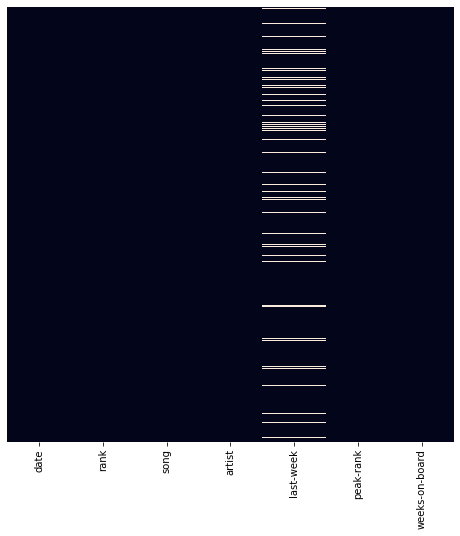

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

### As the null value shows that the song is a new entry we replace the null values with zero

<AxesSubplot:>

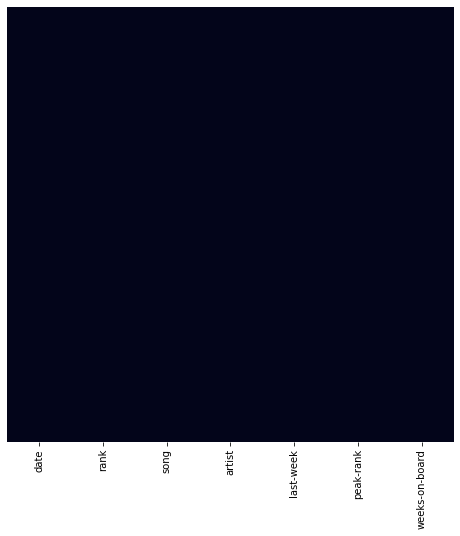

In [8]:
plt.figure(figsize=(8,8))
df['last-week'].fillna(0,inplace=True)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

### The null values are hence removed

### Converting datatype of Date

In [9]:
df['date'] = pd.to_datetime(df['date'])

## Finding the Top 15 Artists with most number 1 appearances

In [10]:
most_1_app = pd.DataFrame(df[df['rank']==1]['artist'].value_counts())
most_1_app.head(15)

,artist
Mariah Carey,65
The Beatles,54
Boyz II Men,34
Madonna,32
Whitney Houston,31
Drake,31
Michael Jackson,30
The Black Eyed Peas,28
Bee Gees,27
Adele,24


# Data Analysis on Taylor Swift Songs

### As a Swiftie, the rest of the Data Analysis is based on her songs

### Let's get started :)

## Finding the number of 1 appearances by Taylor Swift

In [11]:
df[(df['artist']=='Taylor Swift') & (df['rank']==1)].value_counts().sum()

19

## Frequency on Hot 100 chart

In [12]:
df[df['artist']=='Taylor Swift'].value_counts().sum()

1022

## Songs having #1 at the charts

In [13]:
a = pd.DataFrame(df[(df['artist']=='Taylor Swift') & (df['rank']==1)]['song'].value_counts())
a

,song
Blank Space,7
Shake It Off,4
Look What You Made Me Do,3
We Are Never Ever Getting Back Together,3
Willow,1
Cardigan,1


## Visualising the #1 Results

<AxesSubplot:xlabel='count', ylabel='song'>

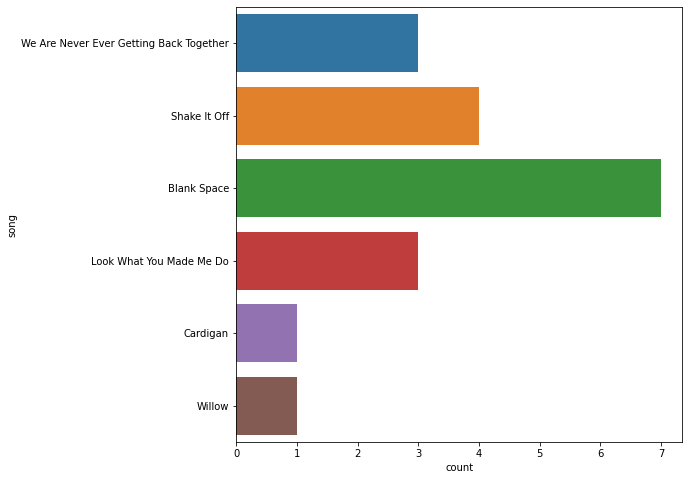

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(y=df[(df['artist']=='Taylor Swift') & (df['rank']==1)]['song'],data=df)

## Top Songs peaking at #5 on the chart

In [15]:
b = pd.DataFrame(df[(df['artist']=='Taylor Swift') & (df['rank']<6) & (df['rank']>0)]['song'].unique())
b.rename( columns={0 :'Song Name'}, inplace=True )
b

,Song Name
0,Love Story
1,You Belong With Me
2,Today Was A Fairytale
3,Mine
4,We Are Never Ever Getting Back Together
5,I Knew You Were Trouble.
6,Shake It Off
7,Blank Space
8,Wildest Dreams
9,Look What You Made Me Do


## Visualization of #5 songs

<AxesSubplot:xlabel='count', ylabel='song'>

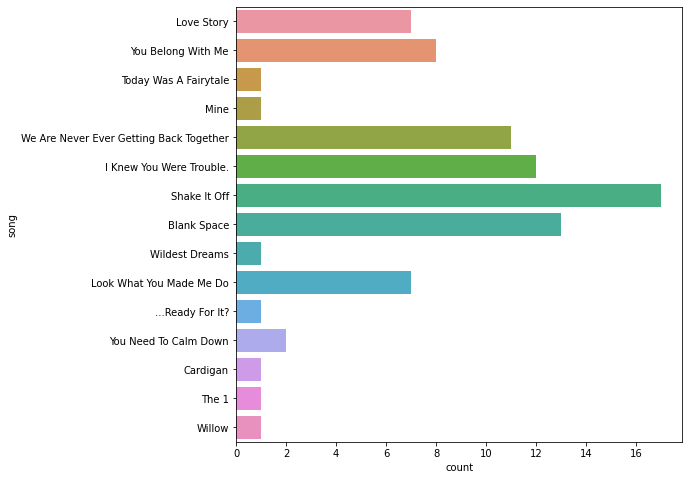

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(y=df[(df['artist']=='Taylor Swift')& (df['rank']<6) & (df['rank']>0)]['song'],data=df)

## Performance Analysis of her Top 6 songs

###  Performance analysis of Blank Space

<AxesSubplot:xlabel='date', ylabel='rank'>

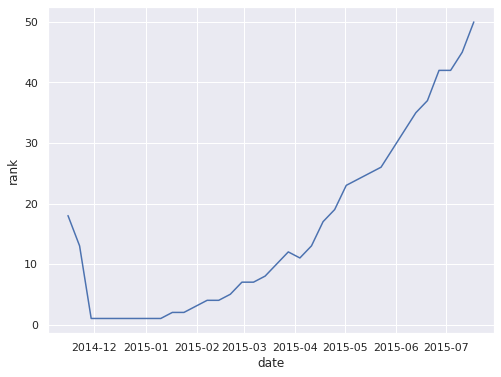

In [17]:
plt.figure(figsize=(8,6))
sns.set_theme()
b_s = df[(df['song']=='Blank Space') & (df['artist']=='Taylor Swift')][['rank','date']]
sns.lineplot(x='date',y='rank',data=b_s)

### Performance analysis of Shake It Off

<AxesSubplot:xlabel='date', ylabel='rank'>

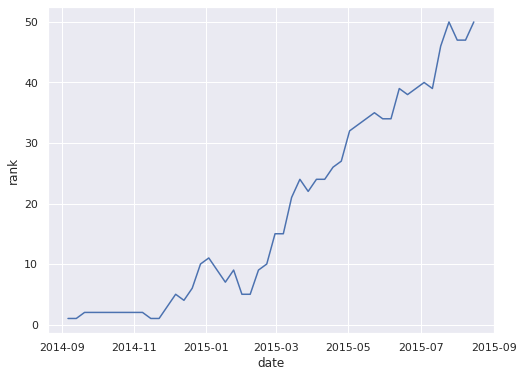

In [18]:
plt.figure(figsize=(8,6))
sns.set_theme()
b_s = df[(df['song']=='Shake It Off') & (df['artist']=='Taylor Swift')][['rank','date']]
sns.lineplot(x='date',y='rank',data=b_s)

### Performance analysis of Look What You Made Me Do

<AxesSubplot:xlabel='date', ylabel='rank'>

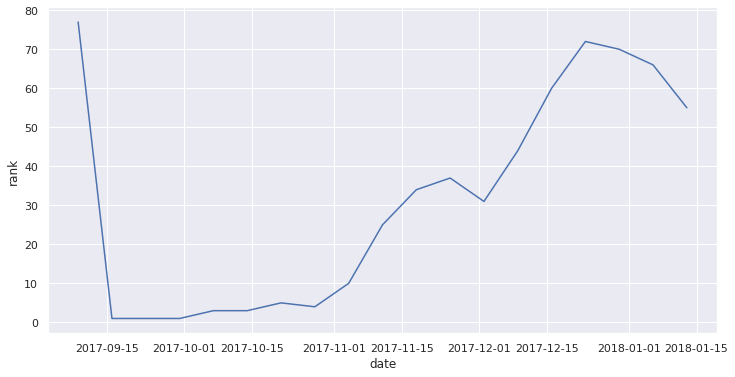

In [19]:
plt.figure(figsize=(12,6))
sns.set_theme()
b_s = df[(df['song']=='Look What You Made Me Do') & (df['artist']=='Taylor Swift')][['rank','date']]
sns.lineplot(x='date',y='rank',data=b_s)

### Performance analysis of We Are Never Ever Getting Back Together

<AxesSubplot:xlabel='date', ylabel='rank'>

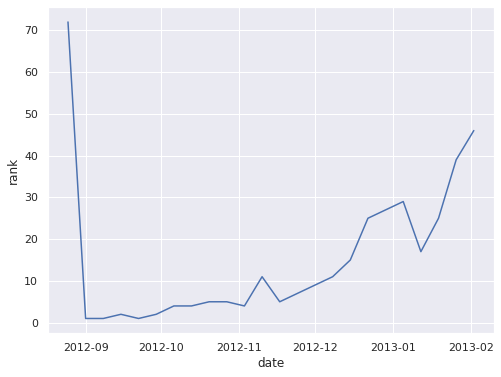

In [20]:
plt.figure(figsize=(8,6))
sns.set_theme()
b_s = df[(df['song']=='We Are Never Ever Getting Back Together') & (df['artist']=='Taylor Swift')][['rank','date']]
sns.lineplot(x='date',y='rank',data=b_s)

### Performance analysis of Cardigan

<AxesSubplot:xlabel='date', ylabel='rank'>

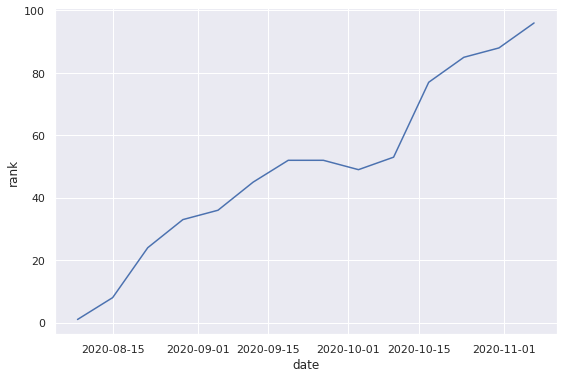

In [21]:
plt.figure(figsize=(9,6))
sns.set_theme()
b_s = df[(df['song']=='Cardigan') & (df['artist']=='Taylor Swift')][['rank','date']]
sns.lineplot(x='date',y='rank',data=b_s)

### Performance analysis of Willow

<AxesSubplot:xlabel='date', ylabel='rank'>

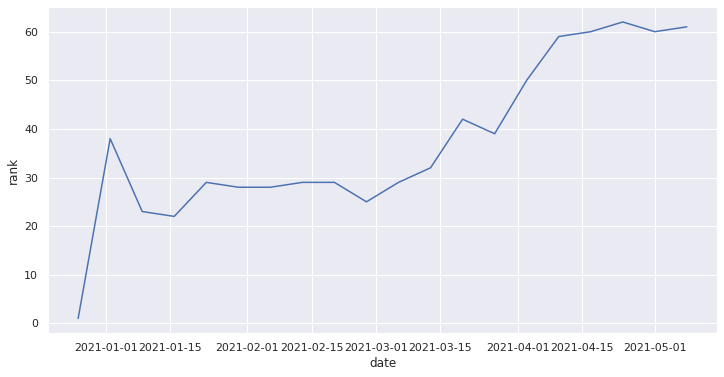

In [22]:
plt.figure(figsize=(12,6))
sns.set_theme()
b_s = df[(df['song']=='Willow') & (df['artist']=='Taylor Swift')][['rank','date']]
sns.lineplot(x='date',y='rank',data=b_s)

### Thanks for viewing my notebook
### Have a nice day
### If you have suggestions for improvements, comment down below